# Visualizing Wildfire Impact on Crop Production

Wildfires can have devastating effects on agriculture, causing significant damage to crop production, leading to economic losses, and posing food security challenges. Understanding the extent and impact of wildfires on crop production is crucial for farmers, policymakers, and researchers. In this Jupyter Notebook, we will explore the visualization analysis of wildfire impact on crop production.

In this notebook, we will cover the following key aspects:

1. Covariance Matrix 
2. Time Series Analysis of Crop Impact vs Smoke Impact
3. Time Series Analysis of AQI vs Crop Impact
4. Prediction of the Crop Impact over the next 25 years

In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# importing wildfire data

df_wf = pd.read_csv('data/muskogee.csv')
df_wf = df_wf.rename(columns={'Fire_Year': 'Year'})
df_wf = df_wf.drop(['Unnamed: 0'], axis = 1)
df_wf.head(10)

,OBJECTID,Assigned_Fire_Type,Year,GIS_Acres,Listed_Fire_Dates,Distance_From_Muskogee
0,14302,Wildfire,1963,10395.01,1963-08-06,1198.52
1,14303,Wildfire,1963,9983.61,1963-08-06,1248.93
2,14304,Wildfire,1963,9674.18,1963-12-31,1122.08
3,14305,Wildfire,1963,4995.91,2018-05-02,623.75
4,14306,Wildfire,1963,4995.25,2018-05-02,635.01
5,14308,Wildfire,1963,4293.41,1963-12-31,1079.79
6,14310,Wildfire,1963,3071.21,1963-12-31,1040.63
7,14311,Wildfire,1963,3022.27,1963-12-31,1098.43
8,14312,Wildfire,1963,2840.56,1963-12-31,1032.66
9,14317,Wildfire,1963,2144.29,1963-05-08,1165.98


In [3]:
# importing smoke estimator data

df_se = pd.read_csv('data/smoke-estimators.csv')
df_se = df_se.rename(columns={'Fire_Year': 'Year'})
df_se = df_se.drop(['Unnamed: 0'], axis = 1)
df_se.head(10)

,Year,GIS_Acres,Distance_From_Muskogee,Smoke_Impact
0,1963,457.405426,773.212766,2.897483e-12
1,1964,1061.792000,788.870588,7.772437e-12
2,1965,497.778571,878.755102,6.465108e-09
3,1966,1416.721204,896.296296,7.751541e-13
4,1967,707.341067,821.666667,3.362399e-12
5,1968,1052.758043,1040.978261,7.710199e-04
6,1969,338.834615,935.153846,2.803907e-12
7,1970,2169.348772,1003.482456,6.181083e-08
8,1971,2475.594122,956.763514,5.350388e-11
9,1972,899.992088,1036.967033,9.551193e-14


In [4]:
# importing AQI data

df_aqi = pd.read_csv("data/avg-aqi-yearly-fire-season.csv")
df_aqi = df_aqi.drop(['Unnamed: 0'], axis = 1)
df_aqi.head(10)

,Year,Avg_AQI
0,1989,30.947368
1,1990,25.466667
2,1991,36.000000
3,1992,30.947368
4,1993,34.666667
5,1994,28.150000
6,1995,34.400000
7,1996,29.052632
8,1997,35.095238
9,1998,39.600000


In [5]:
# importing harvesting data

df_h = pd.read_csv('data/harvest-muskogee.csv')
df_h = df_h.rename(columns={'COMMODITY_DESC': 'Crop', 'YEAR': 'Year', 'AREA HARVESTED': 'Area_Harvested', 'AREA PLANTED': 'Area_Planted', 'CROP IMPACT': 'Crop_Impact'})
df_h.head(10)

,Crop,UNIT_DESC,Year,Area_Harvested,Area_Planted,Crop_Impact
0,SOYBEANS,ACRES,1977,37500.0,39000.0,0.038462
1,SOYBEANS,ACRES,1978,34500.0,37500.0,0.080000
2,SOYBEANS,ACRES,1979,34000.0,38000.0,0.105263
3,SOYBEANS,ACRES,1989,33800.0,35000.0,0.034286
4,SOYBEANS,ACRES,1976,29500.0,30000.0,0.016667
5,SOYBEANS,ACRES,1980,29500.0,34000.0,0.132353
6,SOYBEANS,ACRES,1988,29000.0,30000.0,0.033333
7,SOYBEANS,ACRES,1982,27500.0,29000.0,0.051724
8,SOYBEANS,ACRES,1969,26600.0,29300.0,0.092150
9,SOYBEANS,ACRES,1990,25900.0,29800.0,0.130872


In [6]:
# merging all the imported datasets

df_merged = df_h.merge(df_se, on = 'Year', how = 'left')
df_mer = df_merged.merge(df_aqi, on = 'Year', how = 'left')

df_mer.head(10)

,Crop,UNIT_DESC,Year,Area_Harvested,Area_Planted,Crop_Impact,GIS_Acres,Distance_From_Muskogee,Smoke_Impact,Avg_AQI
0,SOYBEANS,ACRES,1977,37500.0,39000.0,0.038462,607.408523,1011.147727,1.694317e-11,NaN
1,SOYBEANS,ACRES,1978,34500.0,37500.0,0.080000,363.558571,987.508929,2.128623e-11,NaN
2,SOYBEANS,ACRES,1979,34000.0,38000.0,0.105263,1676.487401,1054.401130,2.759696e-14,NaN
3,SOYBEANS,ACRES,1989,33800.0,35000.0,0.034286,2335.694792,904.825758,1.014456e-06,30.947368
4,SOYBEANS,ACRES,1976,29500.0,30000.0,0.016667,748.641532,966.919355,1.697016e-12,NaN
5,SOYBEANS,ACRES,1980,29500.0,34000.0,0.132353,1125.371434,1004.478088,2.153829e-03,NaN
6,SOYBEANS,ACRES,1988,29000.0,30000.0,0.033333,4912.542176,944.166113,4.614193e-05,NaN
7,SOYBEANS,ACRES,1982,27500.0,29000.0,0.051724,950.099663,1045.275281,5.483298e-13,NaN
8,SOYBEANS,ACRES,1969,26600.0,29300.0,0.092150,338.834615,935.153846,2.803907e-12,NaN
9,SOYBEANS,ACRES,1990,25900.0,29800.0,0.130872,1411.387131,895.480874,2.736051e-06,25.466667


In [7]:
# dropping null values

df_sample = df_mer.dropna()

In [8]:
df_sample.shape

(78, 10)

In [9]:
# counting the number of values

df_sample['Crop'].value_counts()

SOYBEANS    26
CORN        24
SORGHUM     14
OATS         8
WHEAT        6
Name: Crop, dtype: int64

Based on the number of years available after combining all datasets, we consider two major crops i.e. soybeans and corn

In [10]:
# initialize the StandardScaler
scaler = StandardScaler()

# drop 'UNIT_DESC' column
df_stan = df_sample.drop(['UNIT_DESC'], axis=1)

# identify the columns to scale (excluding 'Crop' and 'Year')
columns_to_scale = df_stan.columns.difference(['Crop', 'Year'])

# apply StandardScaler to the selected columns
df_stan[columns_to_scale] = scaler.fit_transform(df_stan[columns_to_scale])

In [11]:
df_stan.head()

,Crop,Year,Area_Harvested,Area_Planted,Crop_Impact,GIS_Acres,Distance_From_Muskogee,Smoke_Impact,Avg_AQI
3,SOYBEANS,1989,3.269640,3.001022,-0.646758,0.056626,0.192483,-0.373582,0.166962
9,SOYBEANS,1990,2.244430,2.378915,-0.065775,-0.976210,-0.011534,-0.373580,-0.491472
13,SOYBEANS,1996,1.932974,1.744844,-0.607475,1.970655,1.521568,-0.371950,-0.060666
14,SOYBEANS,1993,1.932974,1.864480,-0.381216,-0.170045,-0.754906,-0.369853,0.613786
16,SOYBEANS,1991,1.855110,1.900371,-0.176871,-0.086270,0.366104,-0.369671,0.773968


## Covariance

# Understanding Covariance

Covariance is a fundamental statistical concept that measures the degree to which two variables change together. In the context of analyzing the impact of wildfires on crop production, covariance can help us assess whether there is a relationship or dependency between different variables, such as weather conditions and crop yields, fire incidents and crop damage, or other relevant factors.

## What is Covariance?

Covariance, denoted as Cov(X, Y), quantifies the tendency of two variables, X and Y, to vary together. It can take on three primary forms:

- **Positive Covariance**: When X tends to increase as Y increases, or X tends to decrease as Y decreases, the covariance is positive. This suggests a positive relationship between the variables, indicating that they move in the same direction.

- **Negative Covariance**: When X tends to decrease as Y increases, or vice versa, the covariance is negative. This implies a negative relationship, indicating that the variables move in opposite directions.

- **Zero Covariance**: If there is no clear pattern between how X and Y change together, the covariance is close to zero, suggesting little to no linear relationship between the variables.

## Interpretation of Covariance

Covariance values themselves can be challenging to interpret because they depend on the units of measurement of the variables. Therefore, it is often more insightful to compare the sign of the covariance to determine the direction of the relationship (positive or negative).

To make covariance values more interpretable, they are often standardized using the correlation coefficient. The correlation coefficient, denoted as "r," measures the strength and direction of a linear relationship between two variables, and it has a range of -1 to 1. A positive "r" indicates a positive linear relationship, while a negative "r" indicates a negative linear relationship.

## Using Covariance in Data Analysis

In our analysis of wildfire impact on crop production, we may calculate the covariance between relevant variables to assess potential relationships. For example, we can calculate the covariance between fire incident severity and crop yield to understand if there is a direct impact. Similarly, we can explore the covariance between weather variables and crop production to identify weather conditions that may contribute to crop damage.

Keep in mind that while covariance provides valuable insights, it does not imply causation. A strong covariance may suggest a relationship, but further statistical analysis and domain knowledge are required to establish causation.

In the following sections of this notebook, we will use covariance analysis to explore the relationships between various factors and assess their impact on crop production in the presence of wildfires.

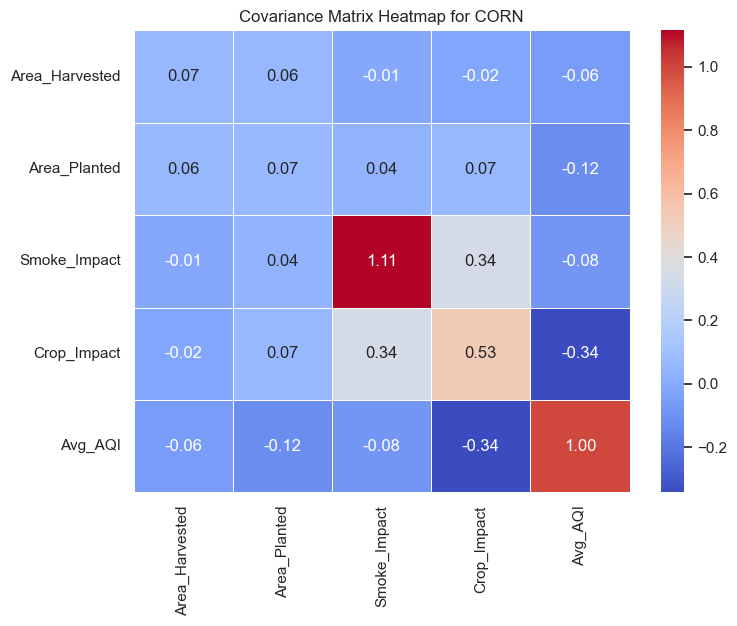

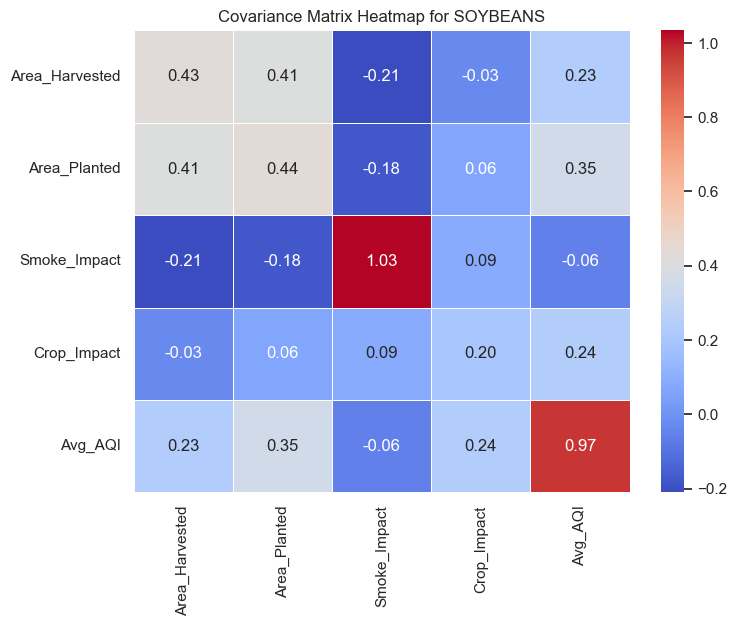

In [12]:
crop = ['CORN', 'SOYBEANS']

for i in crop:
    df = df_stan[df_stan['Crop'] == i]

    df = df.drop(['GIS_Acres', 'Distance_From_Muskogee'], axis = 1)

    selected_columns = ['Area_Harvested', 'Area_Planted', 'Smoke_Impact', 'Crop_Impact', 'Avg_AQI']
    selected_df = df[selected_columns]

    covariance_matrix = selected_df.cov()

    sns.set(style='white')
    plt.figure(figsize=(8, 6))

    sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

    plt.title(f'Covariance Matrix Heatmap for {i}')

    plt.show()


# Visualizing Covariance

Covariance, as discussed earlier, is a measure of the relationship between two variables. Visualizing covariance can provide valuable insights into how two variables change together. In this section, we will create a covariance plot to visually represent the covariance between two variables related to wildfire impact on crop production.

## Covariance Plot

A covariance plot, often referred to as a scatter plot or a scatterplot matrix, is a graphical representation of the covariance or correlation between multiple pairs of variables. Each point on the plot represents a data point, and the position of the point relative to the axes conveys information about how the variables change together.

In our analysis, we will create a covariance plot to visualize the covariance between two key variables, such as fire incident severity and crop yield. This plot will help us understand whether these variables have a positive, negative, or negligible relationship and whether there are any outliers or patterns in the data.

## Interpretation

When examining a covariance plot, consider the following:

- **Direction of Points**: If most points cluster around a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive covariance or correlation, indicating that the variables move together in the same direction.

- **Spread of Points**: The spread of points around the diagonal line indicates the strength of the covariance or correlation. A tight cluster suggests a strong relationship, while a scattered distribution suggests a weaker relationship.

- **Outliers**: Outlying points that deviate significantly from the main cluster may indicate potential anomalies or areas of interest that warrant further investigation.

## Using Covariance Plots

Covariance plots are a useful tool for exploratory data analysis (EDA) and can help identify patterns and relationships in your data. However, it's essential to note that covariance does not imply causation. While a strong covariance or correlation suggests a relationship, further analysis is required to establish causation.

In the next section, we will create and analyze a covariance plot specific to our dataset, focusing on relevant variables related to wildfire impact and crop production. This visualization will provide a clearer understanding of how these variables are related and whether there are any notable trends or outliers.


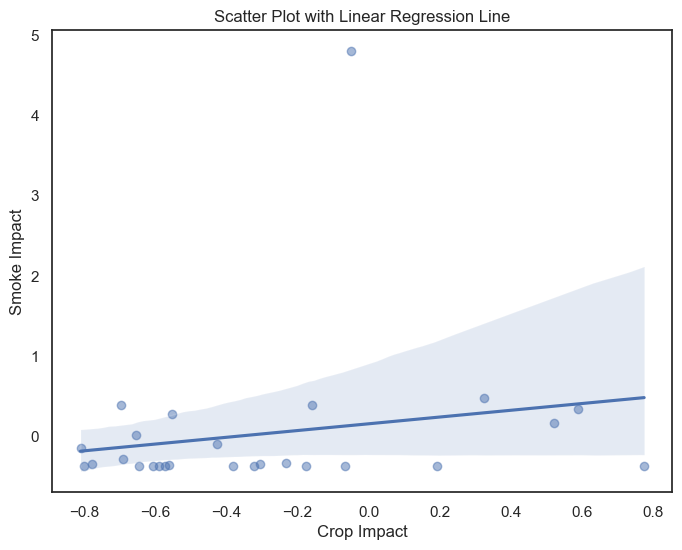

In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Crop_Impact', y='Smoke_Impact', data = selected_df, scatter_kws={'alpha':0.5})

plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Crop Impact')
plt.ylabel('Smoke Impact')

plt.show()

# Analyzing Wildfire Impact Over Time: Time Series Plots

Time series plots are a powerful tool for analyzing how a variable changes over time. In the context of our analysis of wildfire impact on crop production, time series plots can provide valuable insights into trends, seasonality, and the effect of wildfires on crop-related variables. In this section, we will explore the use of time series plots to visualize and analyze our data.

## What are Time Series Plots?

Time series plots are graphical representations of data collected or recorded over a sequence of time intervals. They are particularly useful for studying temporal patterns and trends. A time series plot typically consists of two axes: the horizontal axis represents time (e.g., years, months, days), and the vertical axis represents the variable of interest (e.g., crop yield, fire incidents).

## Time Series Plots

- **Line Plot**: A line plot shows how a single variable changes over time, with data points connected by lines. It helps visualize trends and fluctuations.

## Using Time Series Plots in Our Analysis

In our analysis of wildfire impact on crop production, we will leverage time series plots to:

1. **Visualize Trends**: We will create line plots to visualize how crop production and wildfire incidents have evolved over the years. This will help us identify long-term trends.

2. **Assess Correlations**: Lagged plots will help us assess whether past wildfire incidents have an impact on future crop yields, aiding in predictive modeling.

3. **Detect Anomalies**: Time series plots can be useful for detecting unusual events or anomalies, such as sudden spikes in wildfire incidents or unexpected crop yield changes.

In the upcoming sections, we will create and analyze time series plots specific to our dataset, focusing on variables related to wildfires and crop production. These visualizations will provide valuable insights into the temporal dynamics of our data and support our overall analysis.


In [14]:
def min_max_scale(values_list):
    min_val = min(values_list)
    max_val = max(values_list)
    scaled_values_list = [(value - min_val) / (max_val - min_val) for value in values_list]
    return scaled_values_list

### Crop Impact vs Smoke Impact

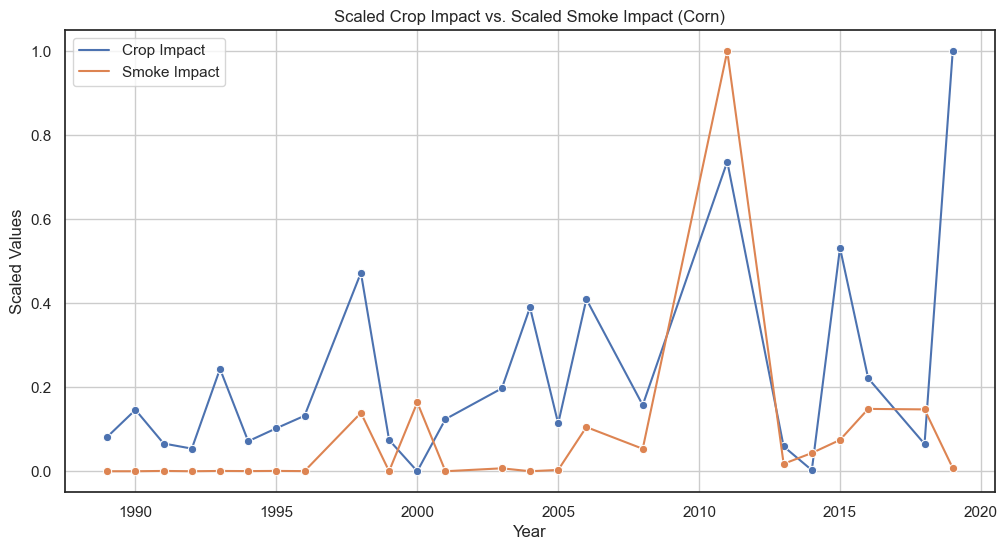

In [15]:
df = df_sample[df_sample['Crop'] == 'CORN']

year = df['Year']
crop = min_max_scale(df['Crop_Impact'])
smoke = min_max_scale(df['Smoke_Impact'])

# create a DataFrame from the scaled data
data = pd.DataFrame({'Year': year, 'Crop Impact': crop, 'Smoke Impact': smoke})

# melt the DataFrame for Seaborn
melted_data = pd.melt(data, id_vars='Year', var_name='Impact Type', value_name='Scaled Values')

# create a Seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Scaled Values', hue='Impact Type', marker='o', linestyle='-', data=melted_data)

plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Scaled Crop Impact vs. Scaled Smoke Impact (Corn)')
plt.legend()
plt.grid(True)
plt.show()

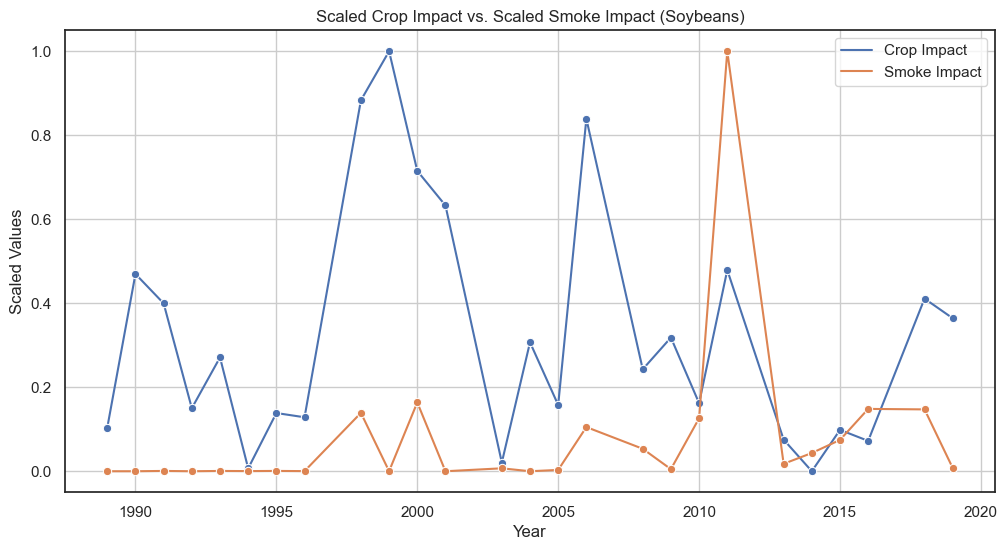

In [16]:
df = df_sample[df_sample['Crop'] == 'SOYBEANS']

year = df['Year']
crop = min_max_scale(df['Crop_Impact'])
smoke = min_max_scale(df['Smoke_Impact'])

# create a DataFrame from the scaled data
data = pd.DataFrame({'Year': year, 'Crop Impact': crop, 'Smoke Impact': smoke})

# melt the DataFrame for Seaborn
melted_data = pd.melt(data, id_vars='Year', var_name='Impact Type', value_name='Scaled Values')

# create a Seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Scaled Values', hue='Impact Type', marker='o', linestyle='-', data=melted_data)

plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Scaled Crop Impact vs. Scaled Smoke Impact (Soybeans)')
plt.legend()
plt.grid(True)
plt.show()

### Crop Impact vs AQI

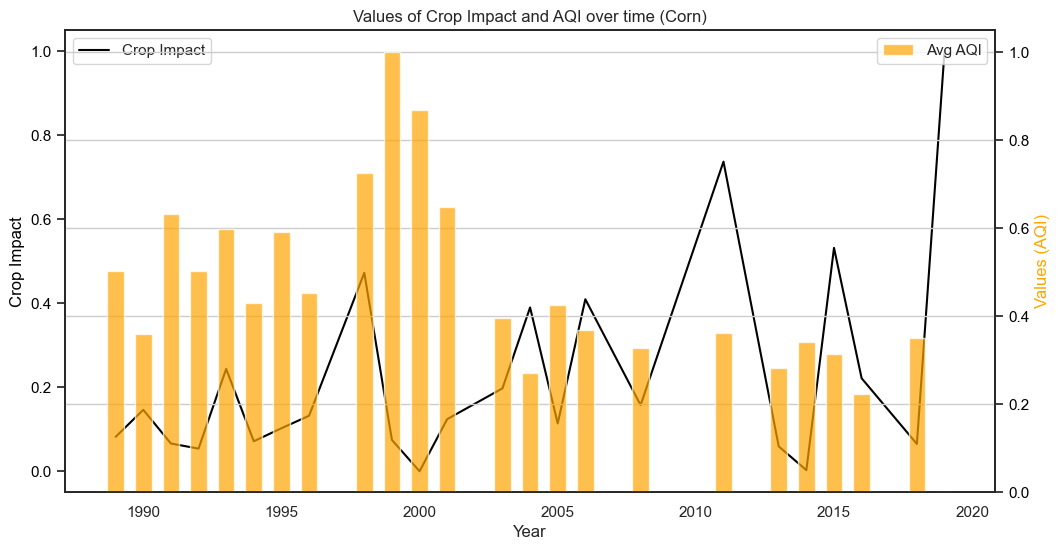

In [17]:
df = df_sample[df_sample['Crop'] == 'CORN']

year = df['Year']
ah = min_max_scale(df['Area_Harvested'])
ap = min_max_scale(df['Area_Planted'])
aqi = min_max_scale(df['Avg_AQI'])
crop = min_max_scale(df['Crop_Impact'])

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x=year, y=crop, ax=ax1, label='Crop Impact', color='black')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crop Impact', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

bar_width = 0.6
ax2.bar(year, aqi, width=bar_width, label='Avg AQI', color='orange', alpha=0.7)

ax2.set_ylabel('Values (AQI)', color='orange')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

plt.title('Values of Crop Impact and AQI over time (Corn)')
plt.grid(True)
plt.show()

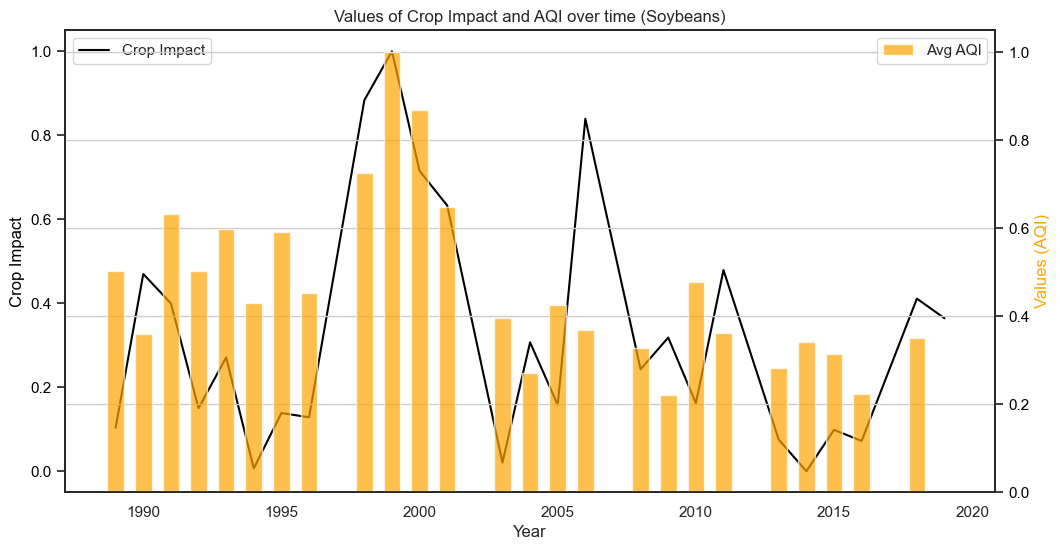

In [18]:
df = df_sample[df_sample['Crop'] == 'SOYBEANS']

year = df['Year']
ah = min_max_scale(df['Area_Harvested'])
ap = min_max_scale(df['Area_Planted'])
aqi = min_max_scale(df['Avg_AQI'])
crop = min_max_scale(df['Crop_Impact'])

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x=year, y=crop, ax=ax1, label='Crop Impact', color='black')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crop Impact', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

bar_width = 0.6
ax2.bar(year, aqi, width=bar_width, label='Avg AQI', color='orange', alpha=0.7)

ax2.set_ylabel('Values (AQI)', color='orange')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

plt.title('Values of Crop Impact and AQI over time (Soybeans)')
plt.grid(True)
plt.show()

# Predictive Modeling with Prophet

Prophet is an open-source forecasting tool developed by Facebook's Core Data Science team. It is designed for time series forecasting and is particularly well-suited for modeling data with strong seasonal patterns and multiple seasonality. In this section, we will explore how to leverage Prophet for predictive modeling in our analysis of wildfire impact on crop production.

## What is Prophet?

Prophet is a robust forecasting framework that offers several advantages for time series forecasting:

- **Automatic Detection of Seasonality**: Prophet can automatically detect and handle various types of seasonal patterns, including yearly, weekly, and daily seasonality.

- **Flexibility**: Prophet is highly customizable, enabling you to adjust seasonality, growth, and holiday parameters to fit your specific dataset.

- **Uncertainty Estimation**: It provides estimates of forecast uncertainty, allowing you to assess the range of possible outcomes.

## Steps for Predictive Modeling with Prophet

To use Prophet for predictive modeling, we typically follow these steps:

1. **Data Preparation**: We start by preparing our time series data, ensuring that it is in the appropriate format with a timestamp column and the target variable (e.g., crop yield).

2. **Model Initialization**: We create a Prophet model, specifying any custom seasonality, holidays, or other parameters.

3. **Fit the Model**: We train the model on our historical data, allowing Prophet to learn the underlying patterns and relationships.

4. **Forecasting**: After training, we use the model to make future forecasts. Prophet provides forecasts for a specified time horizon, along with uncertainty intervals.

5. **Visualization**: We visualize the forecasts and uncertainty intervals using time series plots to assess the model's performance and understand predicted trends.

## Use Cases in Our Analysis

In our analysis of wildfire impact on crop production, we can apply Prophet for various use cases:

- **Crop Impact Forecasting**: We can forecast crop impacr for future years, considering historical data

In the following sections of this notebook, we will demonstrate how to implement Prophet for predictive modeling. We will use historical data related to crop production and wildfire incidents to make forecasts, assess model performance, and gain insights into the potential impact of wildfires on agriculture.


In [19]:
import prophet

# copy the DataFrame for further modifications
df_p = df_sample.copy()

df_p = df_p[df_p['Crop'] == 'CORN']

# select only the relevant columns 'Year' and 'Smoke_Impact'
df_p = df_p[['Year', 'Crop_Impact']]

# convert the 'Year' column to datetime format
df_p['Year'] = pd.to_datetime(df_p['Year'], format='%Y')

# rename columns for compatibility with Prophet
df_p.rename(columns={'Year': 'ds', 'Crop_Impact': 'y'}, inplace=True)

# initialize the Prophet model with weekly seasonality
model = prophet.Prophet(weekly_seasonality=True)

# fit the model using the DataFrame
model.fit(df_p)

# create a DataFrame for future predictions with a frequency of yearly ('Y')
predictions = model.make_future_dataframe(periods=25, freq='Y')

# generate forecast values for the future dates
forecast_values = model.predict(predictions)

# print the last 25 rows of the forecasted values with relevant columns
print(forecast_values[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25))

21:40:36 - cmdstanpy - INFO - Chain [1] start processing
21:40:36 - cmdstanpy - INFO - Chain [1] done processing


           ds      yhat  yhat_lower  yhat_upper
24 2019-12-31  0.210048    0.087706    0.337694
25 2020-12-31  0.308853    0.188637    0.431961
26 2021-12-31  0.191043    0.076804    0.312810
27 2022-12-31  0.216974    0.097335    0.331157
28 2023-12-31  0.229153    0.112993    0.352567
29 2024-12-31  0.250344    0.130334    0.372878
30 2025-12-31  0.158529    0.043562    0.283568
31 2026-12-31  0.330755    0.211805    0.450531
32 2027-12-31  0.206225    0.085193    0.333783
33 2028-12-31  0.269449    0.149305    0.397663
34 2029-12-31  0.208931    0.090740    0.332613
35 2030-12-31  0.272246    0.154054    0.390708
36 2031-12-31  0.173712    0.057753    0.295196
37 2032-12-31  0.246521    0.132481    0.368387
38 2033-12-31  0.275819    0.148248    0.400645
39 2034-12-31  0.291351    0.172041    0.415811
40 2035-12-31  0.224114    0.101806    0.341465
41 2036-12-31  0.214008    0.095775    0.325925
42 2037-12-31  0.389600    0.270578    0.502681
43 2038-12-31  0.268423    0.150930    0

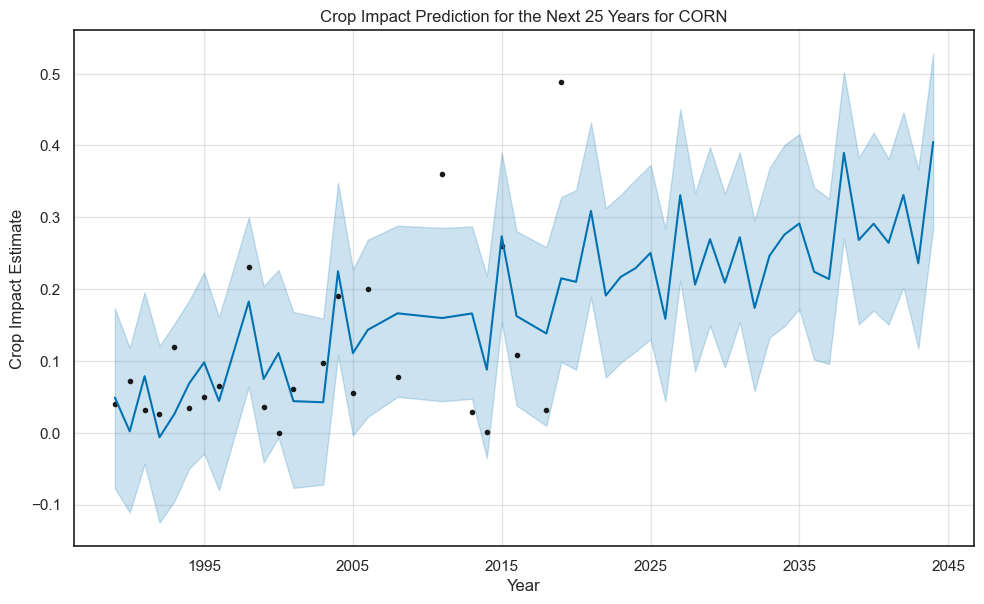

In [20]:
fig = model.plot(forecast_values)
plt.title('Crop Impact Prediction for the Next 25 Years for CORN')
plt.xlabel('Year')
plt.ylabel('Crop Impact Estimate')
plt.show()

In [21]:
import prophet

# copy the DataFrame for further modifications
df_p = df_sample.copy()

df_p = df_p[df_p['Crop'] == 'SOYBEANS']

# select only the relevant columns 'Year' and 'Smoke_Impact'
df_p = df_p[['Year', 'Crop_Impact']]

# convert the 'Year' column to datetime format
df_p['Year'] = pd.to_datetime(df_p['Year'], format='%Y')

# rename columns for compatibility with Prophet
df_p.rename(columns={'Year': 'ds', 'Crop_Impact': 'y'}, inplace=True)

# initialize the Prophet model with weekly seasonality
model = prophet.Prophet(weekly_seasonality=True)

# fit the model using the DataFrame
model.fit(df_p)

# create a DataFrame for future predictions with a frequency of yearly ('Y')
predictions = model.make_future_dataframe(periods=25, freq='Y')

# generate forecast values for the future dates
forecast_values = model.predict(predictions)

# print the last 25 rows of the forecasted values with relevant columns
print(forecast_values[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25))

21:40:36 - cmdstanpy - INFO - Chain [1] start processing
21:40:36 - cmdstanpy - INFO - Chain [1] done processing


           ds      yhat  yhat_lower  yhat_upper
26 2019-12-31  0.070038   -0.018563    0.158812
27 2020-12-31  0.106817    0.019270    0.189559
28 2021-12-31  0.097556    0.014541    0.183371
29 2022-12-31  0.083832   -0.003958    0.163823
30 2023-12-31  0.082186   -0.001356    0.162426
31 2024-12-31  0.068227   -0.014991    0.157407
32 2025-12-31  0.005100   -0.080414    0.090482
33 2026-12-31  0.100179    0.015633    0.179045
34 2027-12-31  0.087971    0.000468    0.173762
35 2028-12-31  0.080375   -0.004487    0.164969
36 2029-12-31  0.096574    0.014157    0.182368
37 2030-12-31  0.061589   -0.025723    0.147948
38 2031-12-31 -0.004485   -0.090573    0.083628
39 2032-12-31  0.086160   -0.009795    0.170482
40 2033-12-31  0.073912   -0.011032    0.161981
41 2034-12-31  0.073738   -0.017325    0.159122
42 2035-12-31  0.086989    0.008105    0.173095
43 2036-12-31 -0.006296   -0.094639    0.080351
44 2037-12-31  0.090259    0.006026    0.175008
45 2038-12-31  0.079523   -0.007830    0

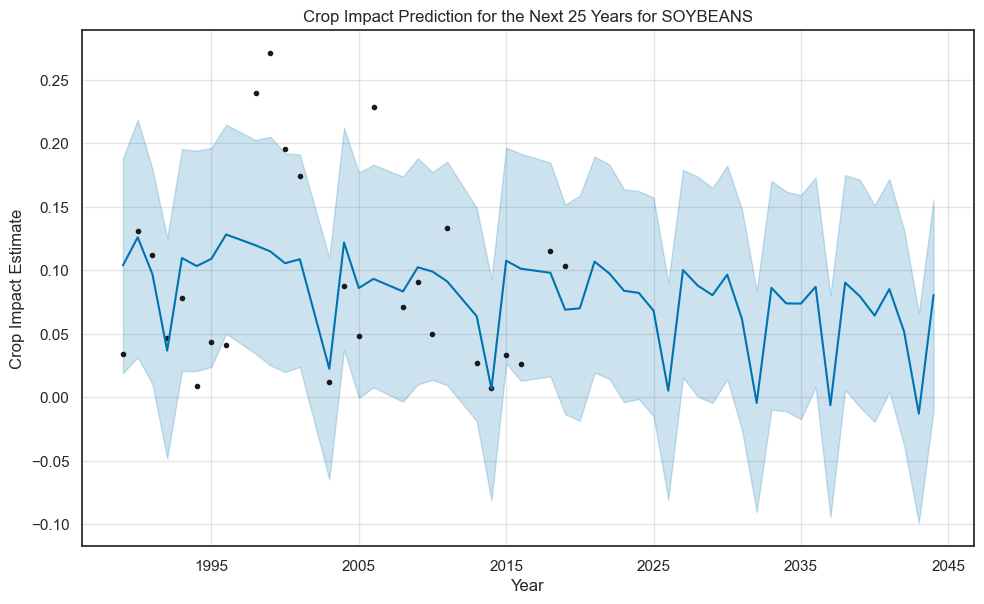

In [22]:
fig = model.plot(forecast_values)
plt.title('Crop Impact Prediction for the Next 25 Years for SOYBEANS')
plt.xlabel('Year')
plt.ylabel('Crop Impact Estimate')
plt.show()